In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
def calculate_probabilities(l01, l02, l10, l13, l20, l23, l31, l32):
    # Матрица коэффициентов для системы линейных уравнений
    coefficient_matrix = np.array([
        [-(l01 + l02), l10, l20, 0],
        [l01, -(l10 + l13), 0, l31],
        [l02, 0, -(l20 + l23), l32],
        [1, 1, 1, 1]  # Условие нормировки вероятностей
    ])

    # Вектор свободных членов
    constant_vector = np.array([0, 0, 0, 1])

    # Решение системы линейных уравнений
    variable_vector = np.linalg.solve(coefficient_matrix, constant_vector)

    # Округление вероятностей до двух знаков после запятой
    return tuple(round(p, 2) for p in variable_vector)

In [5]:
def calculate_income(fn_income, sn_income, fn_repair, sn_repair, time_coefficient, repair_coefficient):
    # Коэффициенты интенсивности потоков
    l01, l02, l10, l13, l20, l23, l31, l32 = (1, 2, 2, 2, 3, 1, 3, 2)

    # Вычисление вероятностей для заданных коэффициентов времени и ремонта
    p0, p1, p2, p3 = calculate_probabilities(
        l01, l02,
        l10 * time_coefficient, l13,
        l20 * time_coefficient, l23,
        l31 * time_coefficient, l32 * time_coefficient
    )

    # Учет коэффициента ремонта
    fn_repair, sn_repair = fn_repair * repair_coefficient, sn_repair * repair_coefficient

    # Расчет среднего чистого дохода с учетом вероятностей и затрат
    return (p0 + p2) * fn_income + (p0 + p1) * sn_income - (p1 + p3) * fn_repair - (p2 + p3) * sn_repair


In [6]:
def main():
    # Ввод значений интенсивности потоков
    _input = input('Введите значения интенсивности потоков через [Пробел] (по умолчанию: 1 2 2 2 3 1 3 2): \n')
    
    # Значения по умолчанию для интенсивности потоков
    default_values = (1, 2, 2, 2, 3, 1, 3, 2)
    if _input:
        l01, l02, l10, l13, l20, l23, l31, l32 = map(int, _input.split())
    else:
        print(f'Используются значения по умолчанию: {default_values}\n')
        l01, l02, l10, l13, l20, l23, l31, l32 = default_values

    # Вычисление вероятностей
    probabilities = calculate_probabilities(l01, l02, l10, l13, l20, l23, l31, l32)
    
    # Вывод вероятностей на экран
    for i, p in enumerate(probabilities):
        print(f'Вероятность что система будет в состоянии S{i} = {p}')

    # Коэффициенты дохода и затрат для первого (fn) и второго (sn) узлов
    fn_income, sn_income = 10, 6
    fn_repair, sn_repair = 4, 2

    # Вычисление среднего чистого дохода с единичными коэффициентами
    avg_income = calculate_income(fn_income, sn_income, fn_repair, sn_repair, 1, 1)
    print(f'Средний чистый доход равен = {avg_income} ден. ед.')

    # Коэффициенты уменьшения времени ремонта и увеличения стоимости затрат варируются от 1 до 50
    time_coefficient, repair_coefficient = np.arange(2, 51, 1), np.arange(2, 51, 1)

    # Создание сетки коэффициентов для расчета дохода
    time_grid, repair_grid = np.meshgrid(time_coefficient, repair_coefficient)

    # Векторизация функции для быстрого вычисления дохода по сетке
    calculate_income_vc = np.vectorize(calculate_income)

    # Расчет доходов в зависимости от коэффициентов
    incomes = calculate_income_vc(fn_income, sn_income, fn_repair, sn_repair, time_grid, repair_grid)

    # Вычисление эффективности как отношение прироста дохода к среднему доходу
    efficiency = (incomes - avg_income) / avg_income * 100

    # Построение графика зависимости эффективности от коэффициентов
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Построение 3D поверхности
    ax.plot_surface(time_grid, repair_grid, efficiency, cmap='viridis')

    # Установка подписей осей
    ax.set_xlabel('Коэффициент времени ремонта')
    ax.set_ylabel('Коэффициент стоимости ремонта')
    ax.set_zlabel('Эффективность, %')

    # Заголовок графика
    plt.title('Оценка эффективности ремонта')

    # Показать график
    plt.show()

Вероятность что система будет в состоянии S0 = 0.4
Вероятность что система будет в состоянии S1 = 0.2
Вероятность что система будет в состоянии S2 = 0.27
Вероятность что система будет в состоянии S3 = 0.13
Средний чистый доход равен = 8.18 ден. ед.


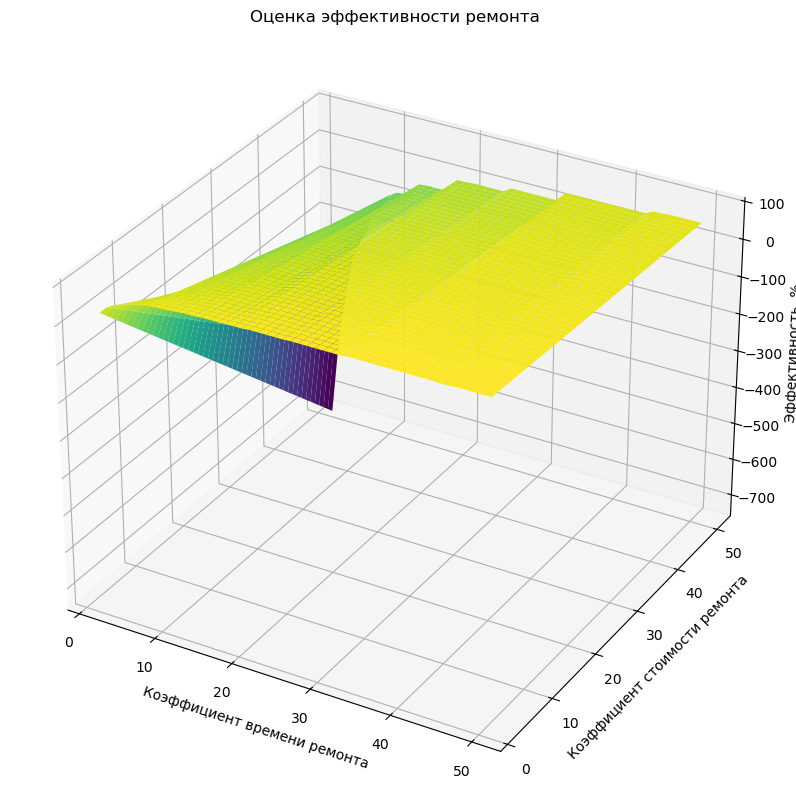

In [7]:
# Запуск основной функции
main()